In [1]:
import numpy as np
import tensorflow as tf
import math
import matplotlib.pyplot as plt

# Hack to get it to work with RTX 2000 cards
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

2021-11-24 09:18:56.859959: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-24 09:18:56.864931: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-24 09:18:56.865316: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [2]:
T = 1000
t = np.linspace(0, 2*np.pi, T)
bs = 16
freqs = np.linspace(200, 400, bs)
y = np.sin(freqs[..., np.newaxis]*t[np.newaxis, ...])
x = np.cos(freqs[..., np.newaxis]*t[np.newaxis, ...])
sample = np.stack([x, y], axis=-1)
print(sample.shape)
print(tf.transpose(sample, [0, 2, 1]).shape)

(16, 1000, 2)
(16, 2, 1000)


2021-11-24 09:18:56.953191: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-24 09:18:56.953667: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-24 09:18:56.954191: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-24 09:18:56.954633: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so retur

In [6]:
sample_tp = tf.cast(tf.transpose(sample, [0, 2, 1]), tf.complex64)
y_fft = tf.signal.fft(sample_tp)
y_ifft = tf.signal.ifft(y_fft)

In [4]:
y_fft.numpy().shape

(16, 2, 1000)

/home/bij/anaconda3/envs/MusicAnalyzer/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


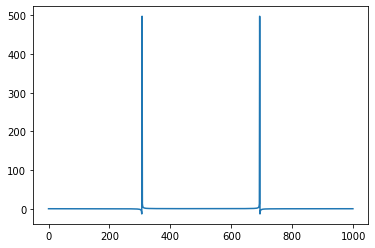

In [5]:
plt.plot(np.arange(T), y_fft[8, 0])
plt.show()